In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import random

In [3]:
def seed_everything(seed):
  random.seed(seed)
  os.environ['PYTHONHASHEED'] = str(seed)
  np.random.seed(seed)
seed_everything(42)

In [52]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submit = pd.read_csv("./submit.csv")

In [53]:
train.head(5)

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [54]:
test.head(5)

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [55]:
submit.head(5)

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,1.462200,1.192973,1.138615,12.952805,30.971239,16.261593,3.209757,-26.133187,-26.148061,-22.172857,24.463823,-26.078327,-26.071199,-26.087317
1,TEST_00002,1.500052,1.218114,1.147487,13.167588,30.887591,16.507907,3.188970,-26.113221,-26.122922,-22.263707,24.407033,-26.056742,-26.052479,-26.067898
2,TEST_00003,1.382944,1.067200,1.021300,14.608024,31.843679,16.224268,3.049995,-26.059612,-26.079587,-22.348805,24.457127,-26.006036,-26.002194,-26.010814
3,TEST_00004,1.353563,1.044562,0.966873,15.251977,32.197070,16.598532,2.987221,-26.076495,-26.095588,-22.209871,24.489625,-26.024492,-26.022156,-26.031402
4,TEST_00005,1.314087,0.958506,0.934164,14.378596,31.146313,16.356404,3.159202,-26.190404,-26.209675,-22.526759,24.217356,-26.136029,-26.127112,-26.140593


In [56]:
x_feature_info = pd.read_csv("./meta/x_feature_info.csv")

In [57]:
x_feature_info

,Feature,설명
0,X_01,PCB 체결 시 단계별 누름량(Step 1)
1,X_02,PCB 체결 시 단계별 누름량(Step 2)
2,X_03,방열 재료 1 무게
3,X_04,1차 검사 통과 여부
4,X_05,PCB 체결 시 단계별 누름량(Step 3)
5,X_06,PCB 체결 시 단계별 누름량(Step 4)
6,X_07,방열 재료 1 면적
7,X_08,방열 재료 2 면적
8,X_09,방열 재료 3 면적
9,X_10,방열 재료 2 무게


In [58]:
y_feature_info = pd.read_csv("./meta/y_feature_info.csv")
y_feature_info

,Feature,설명
0,Y_01,안테나 Gain 평균 (각도1)
1,Y_02,안테나 1 Gain 편차
2,Y_03,안테나 2 Gain 편차
3,Y_04,평균 신호대 잡음비
4,Y_05,안테나 Gain 평균 (각도2)
5,Y_06,신호대 잡음비 (각도1)
6,Y_07,안테나 Gain 평균 (각도3)
7,Y_08,신호대 잡음비 (각도2)
8,Y_09,신호대 잡음비 (각도3)
9,Y_10,신호대 잡음비 (각도4)


In [59]:
y_feature_spec_info = pd.read_csv("./meta/y_feature_spec_info.csv")
y_feature_spec_info

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5
5,Y_06,-19.2,19.0
6,Y_07,2.4,4.0
7,Y_08,-29.2,-24.0
8,Y_09,-29.2,-24.0
9,Y_10,-30.6,-20.0


In [60]:
train_x = train.filter(regex='X')
train_y = train.filter(regex='Y')

In [61]:
submit_df = test[['ID']]

In [62]:
#test_x
test = pd.read_csv("./test.csv").drop(columns = ['ID'])
test.head(5)

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,0.0,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,0.0,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,0.0,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,0.0,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,0.0,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


# Dataset 구성
Concept: 모델의 예측을 방해하는 의미가 덜한 Feature을 줄여보자.

## X(feature) 데이터 묶음: 17groups
-> EDA 이후 1group 탈락, 16groups로 modeling

PCB 체결 시 단계별 누름량
-> EDA 결과에 따라 2 제거

In [14]:
x_group_01 = train_x[['X_01','X_05','X_06']]
x_group_01

,X_01,X_05,X_06
0,70.544,101.892,74.983
1,69.524,101.944,72.943
2,72.583,103.153,72.943
3,71.563,101.971,77.022
4,69.524,101.981,70.904
...,...,...,...
39602,66.465,103.150,66.825
39603,66.465,102.021,66.825
39604,68.504,103.144,68.864
39605,66.465,102.025,67.845


방열 재료 무게
-> EDA 결과에 따라 10, 11 제거

In [15]:
x_group_02 = train_x[['X_03']]
x_group_02

,X_03
0,67.47
1,65.17
2,64.07
3,67.57
4,63.57
...,...
39602,62.27
39603,62.77
39604,64.67
39605,63.67


방열 재료 면적 -> 모두 유지

In [16]:
x_group_03 = train_x[['X_07','X_08','X_09']]
x_group_03

,X_07,X_08,X_09
0,29.45,62.38,245.71
1,28.73,61.23,233.61
2,28.81,105.77,272.20
3,28.92,115.21,255.36
4,29.68,103.38,241.46
...,...,...,...
39602,30.20,77.83,298.05
39603,29.21,102.25,270.67
39604,29.96,102.61,198.07
39605,30.30,112.60,275.52


검사 통과 여부 -> 모두 제거

In [17]:
train_x[['X_04','X_23','X_47','X_48']]

,X_04,X_23,X_47,X_48
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
39602,1,1,1,1
39603,1,1,1,1
39604,1,1,1,1
39605,1,1,1,1


커넥터 위치 기준 좌표 -> 유지

In [18]:
x_group_04 = train_x[['X_12']]
x_group_04

,X_12
0,4.34
1,4.38
2,4.36
3,4.33
4,4.35
...,...
39602,4.36
39603,4.40
39604,4.38
39605,4.33


안테나 패드 위치 차이 -> 유지

In [19]:
x_group_05 = train_x[['X_13']]
x_group_05

,X_13
0,0.18
1,0.18
2,0.15
3,0.21
4,0.16
...,...
39602,0.15
39603,0.13
39604,0.14
39605,0.16


안테나 패드 위치 -> 유지

In [20]:
x_group_06 = train_x[['X_14','X_15','X_16','X_17']]
x_group_06

,X_14,X_15,X_16,X_17
0,13.34,13.37,13.40,13.52
1,13.33,13.33,13.46,13.51
2,13.36,13.36,13.39,13.51
3,13.30,13.33,13.39,13.51
4,13.35,13.34,13.41,13.50
...,...,...,...,...
39602,13.37,13.38,13.51,13.52
39603,13.36,13.36,13.47,13.49
39604,13.38,13.39,13.47,13.52
39605,13.36,13.38,13.45,13.52


In [21]:
x_group_07 = train_x[['X_19','X_20','X_21','X_22']]
x_group_07

,X_19,X_20,X_21,X_22
0,3.11,3.17,3.06,3.13
1,2.97,3.11,2.91,3.20
2,3.04,3.04,3.01,3.12
3,3.05,3.01,3.02,3.08
4,3.04,3.07,3.00,3.12
...,...,...,...,...
39602,3.20,3.03,3.06,3.13
39603,3.15,3.06,3.05,3.06
39604,3.23,3.09,3.07,3.12
39605,3.18,3.01,3.15,3.09


In [22]:
x_group_08 = train_x[['X_24','X_25','X_26','X_27','X_28','X_29']]
x_group_08

,X_24,X_25,X_26,X_27,X_28,X_29
0,2.05,2.07,2.05,2.06,2.06,2.35
1,2.10,2.10,2.10,2.10,2.17,2.28
2,2.07,2.06,2.04,2.07,2.10,2.26
3,2.06,2.05,2.03,2.06,2.07,2.12
4,2.09,2.06,2.09,2.12,2.33,2.13
...,...,...,...,...,...,...
39602,2.10,2.11,2.08,2.11,2.10,2.20
39603,2.12,2.12,2.09,2.12,2.11,2.20
39604,2.13,2.09,2.08,2.07,2.12,2.16
39605,2.07,2.03,2.05,2.05,2.10,2.12


In [23]:
x_group_09 = train_x[['X_30','X_31','X_32','X_33']]
x_group_09

,X_30,X_31,X_32,X_33
0,1.49,1.69,1.46,1.74
1,1.49,1.67,1.45,1.66
2,1.49,1.69,1.46,1.68
3,1.47,1.68,1.47,1.68
4,1.49,1.68,1.47,1.82
...,...,...,...,...
39602,1.37,1.60,1.36,1.67
39603,1.40,1.68,1.37,1.77
39604,1.39,1.61,1.37,1.58
39605,1.37,1.56,1.36,1.67


In [24]:
x_group_10 = train_x[['X_34','X_35','X_36','X_37']]
x_group_10

,X_34,X_35,X_36,X_37
0,12.99,12.88,12.89,12.99
1,12.92,12.87,12.89,12.93
2,12.97,12.87,12.87,13.00
3,12.91,12.97,12.99,12.92
4,12.96,12.85,12.91,12.96
...,...,...,...,...
39602,12.89,13.00,12.94,12.90
39603,12.88,12.88,12.89,12.86
39604,12.98,12.98,12.98,12.81
39605,12.91,12.90,12.96,12.97


In [25]:
x_group_11 = train_x[['X_38','X_39','X_40']]
x_group_11

,X_38,X_39,X_40
0,-16.41,-16.36,-17.03
1,-16.06,-16.11,-16.74
2,-16.16,-16.17,-16.76
3,-16.05,-16.03,-16.67
4,-16.25,-16.23,-16.85
...,...,...,...
39602,-16.09,-16.15,-16.79
39603,-15.70,-15.74,-16.40
39604,-16.12,-16.19,-16.80
39605,-16.36,-16.36,-16.97


In [26]:
x_group_12 = train_x[['X_41','X_42','X_43','X_44']]
x_group_12

,X_41,X_42,X_43,X_44
0,21.20,20.99,21.28,21.09
1,21.16,21.03,21.16,21.13
2,21.13,21.03,21.17,21.12
3,21.18,20.98,21.20,21.09
4,21.16,20.96,21.18,21.10
...,...,...,...,...
39602,21.17,21.08,21.19,21.19
39603,21.16,21.09,21.21,21.19
39604,21.17,21.09,21.22,21.19
39605,21.15,21.05,21.16,21.13


In [27]:
x_group_13 = train_x[['X_45']]
x_group_13

,X_45
0,0.29
1,0.13
2,0.14
3,0.22
4,0.22
...,...
39602,0.11
39603,0.12
39604,0.13
39605,0.11


In [28]:
x_group_14 = train_x[['X_46']]
x_group_14

,X_46
0,1463
1,1463
2,1468
3,1469
4,1469
...,...
39602,1469
39603,1458
39604,1459
39605,1469


In [29]:
x_group_15 = train_x[['X_49']]
x_group_15

,X_49
0,9706.03
1,10423.43
2,10948.53
3,15007.03
4,11051.03
...,...
39602,60630.73
39603,60763.43
39604,8813.33
39605,62222.33


In [30]:
x_group_16 = train_x[['X_50','X_51','X_52','X_53','X_54','X_55','X_56']]
x_group_16

,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...
39602,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


## Y(target) 데이터 묶음: 4groups

In [31]:
#안테나 Gain 평균 (4개 각도별)
y_group_01 = train_y[['Y_01', 'Y_05', 'Y_07', 'Y_11']]
y_group_01

,Y_01,Y_05,Y_07,Y_11
0,2.056,29.632,4.276,23.792
1,1.446,33.179,3.229,24.691
2,1.251,31.801,2.839,24.649
3,1.464,34.503,3.144,24.913
4,0.983,32.602,3.138,25.299
...,...,...,...,...
39602,1.382,29.194,3.410,24.261
39603,1.482,29.859,3.406,23.427
39604,1.117,24.720,3.215,24.301
39605,0.895,26.412,4.216,23.305


In [32]:
#안테나 Gain 편차
y_group_02 = train_y[['Y_02', 'Y_03']]
y_group_02

,Y_02,Y_03
0,1.456,1.680
1,1.184,1.268
2,0.665,0.782
3,1.079,1.052
4,0.646,0.689
...,...,...
39602,1.215,1.263
39603,0.606,1.083
39604,1.154,0.993
39605,0.187,0.477


In [33]:
#평균 신호대 잡음비
y_group_03 = train_y[['Y_04']]
y_group_03

,Y_04
0,10.502
1,18.507
2,14.082
3,16.975
4,15.047
...,...
39602,10.874
39603,8.759
39604,13.159
39605,9.123


In [34]:
#신호대 잡음비 (7개 각도별)
y_group_04 = train_y[['Y_06', 'Y_08', 'Y_09', 'Y_10', 'Y_12', 'Y_13', 'Y_14']]
y_group_04

,Y_06,Y_08,Y_09,Y_10,Y_12,Y_13,Y_14
0,16.083,-25.381,-25.529,-22.769,-25.470,-25.409,-25.304
1,16.736,-26.619,-26.523,-22.574,-26.253,-26.497,-26.438
2,17.080,-26.238,-26.216,-22.169,-26.285,-26.215,-26.370
3,17.143,-25.426,-25.079,-21.765,-25.254,-25.021,-25.345
4,17.569,-25.376,-25.242,-21.072,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...
39602,16.582,-26.486,-26.581,-22.772,-26.491,-26.584,-26.580
39603,15.659,-27.308,-27.203,-24.674,-27.250,-27.334,-27.325
39604,16.823,-26.502,-26.687,-22.577,-26.388,-26.425,-26.601
39605,15.757,-26.760,-26.634,-24.066,-26.536,-26.751,-26.635


# EDA
https://dacon.io/competitions/official/235927/codeshare/6052?page=1&dtype=recent 참고해 진행

# Modeling
Try2에서와 동일하게 Pycaret 모델링

In [35]:
feature_set = pd.concat([x_group_01, x_group_02, x_group_03, x_group_04, x_group_05, x_group_06, x_group_07, x_group_08, x_group_09, x_group_10, x_group_11, x_group_12, x_group_13, x_group_14, x_group_15, x_group_16], axis=1)
feature_set

,X_01,X_05,X_06,X_03,X_07,X_08,X_09,X_12,X_13,X_14,...,X_45,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,101.892,74.983,67.47,29.45,62.38,245.71,4.34,0.18,13.34,...,0.29,1463,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,101.944,72.943,65.17,28.73,61.23,233.61,4.38,0.18,13.33,...,0.13,1463,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.153,72.943,64.07,28.81,105.77,272.20,4.36,0.15,13.36,...,0.14,1468,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,101.971,77.022,67.57,28.92,115.21,255.36,4.33,0.21,13.30,...,0.22,1469,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,101.981,70.904,63.57,29.68,103.38,241.46,4.35,0.16,13.35,...,0.22,1469,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.150,66.825,62.27,30.20,77.83,298.05,4.36,0.15,13.37,...,0.11,1469,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,102.021,66.825,62.77,29.21,102.25,270.67,4.40,0.13,13.36,...,0.12,1458,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.144,68.864,64.67,29.96,102.61,198.07,4.38,0.14,13.38,...,0.13,1459,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,102.025,67.845,63.67,30.30,112.60,275.52,4.33,0.16,13.36,...,0.11,1469,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [36]:
train_y01 = feature_set.copy()
train_y02 = feature_set.copy()
train_y03 = feature_set.copy()
train_y04 = feature_set.copy()
train_y05 = feature_set.copy()
train_y06 = feature_set.copy()
train_y07 = feature_set.copy()
train_y08 = feature_set.copy()
train_y09 = feature_set.copy()
train_y10 = feature_set.copy()
train_y11 = feature_set.copy()
train_y12 = feature_set.copy()
train_y13 = feature_set.copy()
train_y14 = feature_set.copy()

In [37]:
train_y01['Y_01'] = train['Y_01']
train_y02['Y_02'] = train['Y_02']
train_y03['Y_03'] = train['Y_03']
train_y04['Y_04'] = train['Y_04']
train_y05['Y_05'] = train['Y_05']
train_y06['Y_06'] = train['Y_06']
train_y07['Y_07'] = train['Y_07']
train_y08['Y_08'] = train['Y_08']
train_y09['Y_09'] = train['Y_09']
train_y10['Y_10'] = train['Y_10']
train_y11['Y_11'] = train['Y_11']
train_y12['Y_12'] = train['Y_12']
train_y13['Y_13'] = train['Y_13']
train_y14['Y_14'] = train['Y_14']

In [38]:
train_y14

,X_01,X_05,X_06,X_03,X_07,X_08,X_09,X_12,X_13,X_14,...,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,Y_14
0,70.544,101.892,74.983,67.47,29.45,62.38,245.71,4.34,0.18,13.34,...,1463,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,-25.304
1,69.524,101.944,72.943,65.17,28.73,61.23,233.61,4.38,0.18,13.33,...,1463,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,-26.438
2,72.583,103.153,72.943,64.07,28.81,105.77,272.20,4.36,0.15,13.36,...,1468,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,-26.370
3,71.563,101.971,77.022,67.57,28.92,115.21,255.36,4.33,0.21,13.30,...,1469,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,-25.345
4,69.524,101.981,70.904,63.57,29.68,103.38,241.46,4.35,0.16,13.35,...,1469,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.150,66.825,62.27,30.20,77.83,298.05,4.36,0.15,13.37,...,1469,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812,-26.580
39603,66.465,102.021,66.825,62.77,29.21,102.25,270.67,4.40,0.13,13.36,...,1458,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413,-27.325
39604,68.504,103.144,68.864,64.67,29.96,102.61,198.07,4.38,0.14,13.38,...,1459,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699,-26.601
39605,66.465,102.025,67.845,63.67,30.30,112.60,275.52,4.33,0.16,13.36,...,1469,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929,-26.635


In [39]:
from pycaret.regression import *

In [40]:
reg101 = setup(data = train_y01, target = 'Y_01')

,Description,Value
0,Session id,1974
1,Target,Y_01
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [41]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2696,0.1222,0.3496,0.0446,0.1532,0.2822,0.0840
gbr,Gradient Boosting Regressor,0.2695,0.1225,0.3500,0.0421,0.1535,0.2853,1.6570
rf,Random Forest Regressor,0.2702,0.1227,0.3502,0.0411,0.1534,0.2810,6.9910
et,Extra Trees Regressor,0.2702,0.1232,0.3510,0.0370,0.1539,0.2862,2.8750
lr,Linear Regression,0.2724,0.1247,0.3531,0.0253,0.1550,0.2902,0.2880
ridge,Ridge Regression,0.2724,0.1247,0.3531,0.0253,0.1550,0.2903,0.0300
br,Bayesian Ridge,0.2724,0.1247,0.3532,0.0250,0.1550,0.2904,0.0490
omp,Orthogonal Matching Pursuit,0.2740,0.1260,0.3550,0.0149,0.1558,0.2923,0.0290
lar,Least Angle Regression,0.2747,0.1266,0.3558,0.0104,0.1560,0.2917,0.0280
lasso,Lasso Regression,0.2761,0.1279,0.3575,0.0007,0.1568,0.2932,0.0320


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2666,0.1179,0.3434,0.0505,0.1509,0.2491
1,0.2691,0.1234,0.3513,0.0517,0.1560,0.3359
2,0.2701,0.1220,0.3493,0.0470,0.1537,0.2947
3,0.2696,0.1219,0.3491,0.0555,0.1545,0.2720
4,0.2640,0.1180,0.3435,0.0525,0.1496,0.2844
5,0.2708,0.1243,0.3525,0.0367,0.1554,0.3021
6,0.2677,0.1199,0.3462,0.0422,0.1506,0.2699
7,0.2731,0.1279,0.3577,0.0567,0.1568,0.3235
8,0.2709,0.1236,0.3515,0.0379,0.1531,0.2624


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [42]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2666,0.1179,0.3434,0.0505,0.1509,0.2491
1,0.2691,0.1234,0.3513,0.0517,0.1560,0.3359
2,0.2701,0.1220,0.3493,0.0470,0.1537,0.2947
3,0.2696,0.1219,0.3491,0.0555,0.1545,0.2720
4,0.2640,0.1180,0.3435,0.0525,0.1496,0.2844
5,0.2708,0.1243,0.3525,0.0367,0.1554,0.3021
6,0.2677,0.1199,0.3462,0.0422,0.1506,0.2699
7,0.2731,0.1279,0.3577,0.0567,0.1568,0.3235
8,0.2709,0.1236,0.3515,0.0379,0.1531,0.2624


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [43]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2658,0.1175,0.3428,0.0541,0.1507,0.2489
1,0.2691,0.1230,0.3508,0.0546,0.1558,0.3370
2,0.2700,0.1221,0.3494,0.0464,0.1537,0.2962
3,0.2698,0.1218,0.3491,0.0557,0.1544,0.2725
4,0.2633,0.1177,0.3431,0.0553,0.1495,0.2870
5,0.2705,0.1242,0.3524,0.0372,0.1555,0.3026
6,0.2676,0.1197,0.3460,0.0435,0.1506,0.2703
7,0.2729,0.1278,0.3575,0.0574,0.1567,0.3239
8,0.2702,0.1233,0.3511,0.0403,0.1530,0.2628


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=1974)),
                                                            ('Gradient '
                                                             'Boosting '
                                                             'Regressor',
                                                             GradientBoostingRegressor(random_state=1974))],
                                                n_jobs=-1),
                 random_state=1974)

Finished loading model, total used 100 iterations


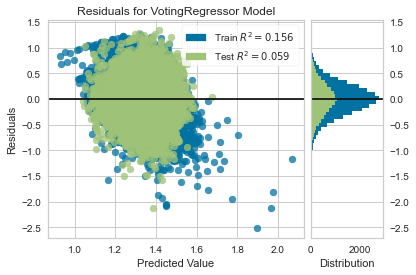

In [44]:
plot_model(tuned_blender)

In [63]:
submit_df['Y_01'] = predict_model(tuned_blender, data=test)['prediction_label']

In [65]:
reg102 = setup(data = train_y02, target = 'Y_02')

,Description,Value
0,Session id,559
1,Target,Y_02
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [66]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2975,0.1431,0.3782,0.0427,0.1875,0.5467,1.6930
lightgbm,Light Gradient Boosting Machine,0.2976,0.1431,0.3783,0.0423,0.1874,0.5397,0.1050
rf,Random Forest Regressor,0.2979,0.1433,0.3786,0.0410,0.1878,0.5432,7.0980
et,Extra Trees Regressor,0.2983,0.1436,0.3790,0.0389,0.1880,0.5498,2.8490
lr,Linear Regression,0.2998,0.1449,0.3806,0.0304,0.1888,0.5564,0.3040
ridge,Ridge Regression,0.2998,0.1449,0.3806,0.0304,0.1889,0.5566,0.0350
br,Bayesian Ridge,0.2999,0.1450,0.3807,0.0299,0.1889,0.5569,0.0540
omp,Orthogonal Matching Pursuit,0.3018,0.1464,0.3826,0.0202,0.1899,0.5605,0.0290
lar,Least Angle Regression,0.3033,0.1487,0.3856,0.0051,0.1912,0.5591,0.0320
lasso,Lasso Regression,0.3051,0.1493,0.3864,0.0009,0.1918,0.5569,0.0340


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3002,0.1432,0.3784,0.0429,0.1890,0.5278
1,0.2916,0.1407,0.3751,0.0362,0.1852,0.5180
2,0.2976,0.1452,0.3810,0.0525,0.1875,0.5269
3,0.2950,0.1364,0.3693,0.0466,0.1846,0.5440
4,0.2993,0.1466,0.3829,0.0423,0.1887,0.5752
5,0.2957,0.1408,0.3752,0.0458,0.1853,0.5520
6,0.2975,0.1407,0.3751,0.0452,0.1864,0.5528
7,0.3043,0.1504,0.3878,0.0397,0.1920,0.5029
8,0.2935,0.1403,0.3746,0.0647,0.1852,0.5258


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [67]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3002,0.1432,0.3784,0.0429,0.1890,0.5278
1,0.2916,0.1407,0.3751,0.0362,0.1852,0.5180
2,0.2976,0.1452,0.3810,0.0525,0.1875,0.5269
3,0.2950,0.1364,0.3693,0.0466,0.1846,0.5440
4,0.2993,0.1466,0.3829,0.0423,0.1887,0.5752
5,0.2957,0.1408,0.3752,0.0458,0.1853,0.5520
6,0.2975,0.1407,0.3751,0.0452,0.1864,0.5528
7,0.3043,0.1504,0.3878,0.0397,0.1920,0.5029
8,0.2935,0.1403,0.3746,0.0647,0.1852,0.5258


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [68]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3000,0.1427,0.3777,0.0462,0.1888,0.5287
1,0.2912,0.1399,0.3740,0.0418,0.1847,0.5172
2,0.2978,0.1454,0.3813,0.0511,0.1876,0.5295
3,0.2943,0.1357,0.3684,0.0513,0.1842,0.5393
4,0.2987,0.1462,0.3824,0.0446,0.1885,0.5735
5,0.2947,0.1401,0.3744,0.0500,0.1848,0.5523
6,0.2972,0.1403,0.3746,0.0478,0.1862,0.5532
7,0.3046,0.1507,0.3882,0.0377,0.1922,0.5044
8,0.2934,0.1404,0.3747,0.0643,0.1853,0.5320


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Gradient '
                                                             'Boosting '
                                                             'Regressor',
                                                             GradientBoostingRegressor(random_state=559)),
                                                            ('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=559))],
                                                n_jobs=-1),
                 random_state=559)

In [69]:
submit_df['Y_02'] = predict_model(tuned_blender, data=test)['prediction_label']

In [70]:
reg103 = setup(data = train_y03, target = 'Y_03')

,Description,Value
0,Session id,4656
1,Target,Y_03
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [71]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2790,0.1264,0.3555,0.0372,0.1782,0.4014,1.8150
rf,Random Forest Regressor,0.2794,0.1265,0.3556,0.0366,0.1783,0.4001,7.2070
lightgbm,Light Gradient Boosting Machine,0.2793,0.1266,0.3559,0.0354,0.1782,0.3988,0.0840
et,Extra Trees Regressor,0.2800,0.1274,0.3570,0.0294,0.1790,0.4040,2.8790
lr,Linear Regression,0.2812,0.1283,0.3581,0.0230,0.1797,0.4076,0.0990
ridge,Ridge Regression,0.2812,0.1283,0.3581,0.0230,0.1797,0.4076,0.0340
br,Bayesian Ridge,0.2813,0.1283,0.3582,0.0226,0.1797,0.4079,0.0590
lar,Least Angle Regression,0.2833,0.1300,0.3605,0.0099,0.1809,0.4092,0.0340
omp,Orthogonal Matching Pursuit,0.2837,0.1302,0.3608,0.0085,0.1811,0.4120,0.0320
lasso,Lasso Regression,0.2847,0.1311,0.3621,0.0015,0.1818,0.4137,0.0310


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2786,0.1254,0.3542,0.0425,0.1781,0.4151
1,0.2800,0.1259,0.3548,0.0405,0.1784,0.3904
2,0.2784,0.1272,0.3566,0.0322,0.1791,0.4328
3,0.2732,0.1206,0.3473,0.0488,0.1754,0.3938
4,0.2766,0.1260,0.3549,0.0473,0.1778,0.4280
5,0.2816,0.1291,0.3593,0.0452,0.1779,0.3749
6,0.2792,0.1259,0.3548,0.0425,0.1773,0.3958
7,0.2766,0.1232,0.3510,0.0448,0.1759,0.3867
8,0.2799,0.1274,0.3570,0.0489,0.1787,0.3791


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [72]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2786,0.1254,0.3542,0.0425,0.1781,0.4151
1,0.2800,0.1259,0.3548,0.0405,0.1784,0.3904
2,0.2784,0.1272,0.3566,0.0322,0.1791,0.4328
3,0.2732,0.1206,0.3473,0.0488,0.1754,0.3938
4,0.2766,0.1260,0.3549,0.0473,0.1778,0.4280
5,0.2816,0.1291,0.3593,0.0452,0.1779,0.3749
6,0.2792,0.1259,0.3548,0.0425,0.1773,0.3958
7,0.2766,0.1232,0.3510,0.0448,0.1759,0.3867
8,0.2799,0.1274,0.3570,0.0489,0.1787,0.3791


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [73]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2784,0.1255,0.3542,0.0423,0.1782,0.4164
1,0.2805,0.1259,0.3549,0.0400,0.1784,0.3903
2,0.2777,0.1265,0.3557,0.0375,0.1787,0.4330
3,0.2737,0.1209,0.3477,0.0468,0.1758,0.3970
4,0.2767,0.1261,0.3551,0.0465,0.1779,0.4306
5,0.2816,0.1293,0.3596,0.0433,0.1782,0.3770
6,0.2794,0.1262,0.3553,0.0400,0.1775,0.3970
7,0.2767,0.1234,0.3513,0.0431,0.1760,0.3886
8,0.2801,0.1277,0.3573,0.0470,0.1789,0.3804


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=4656)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=4656))],
                n_jobs=-1)

In [74]:
submit_df['Y_03'] = predict_model(tuned_blender, data=test)['prediction_label']

In [75]:
reg104 = setup(data = train_y04, target = 'Y_04')

,Description,Value
0,Session id,4162
1,Target,Y_04
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [76]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.0758,6.7813,2.5996,0.0671,0.1902,0.1715,7.1860
et,Extra Trees Regressor,2.0818,6.8123,2.6056,0.0628,0.1906,0.1718,2.6840
lightgbm,Light Gradient Boosting Machine,2.0791,6.8135,2.6058,0.0626,0.1908,0.1720,0.1890
gbr,Gradient Boosting Regressor,2.0975,6.9533,2.6328,0.0425,0.1921,0.1737,4.1180
lr,Linear Regression,2.1207,7.0188,2.6454,0.0336,0.1937,0.1755,0.4190
ridge,Ridge Regression,2.1215,7.0204,2.6457,0.0334,0.1937,0.1756,0.0220
br,Bayesian Ridge,2.1217,7.0215,2.6459,0.0332,0.1937,0.1756,0.0700
lar,Least Angle Regression,2.1246,7.0505,2.6514,0.0291,0.1941,0.1758,0.0380
omp,Orthogonal Matching Pursuit,2.1407,7.1354,2.6676,0.0171,0.1953,0.1773,0.0340
xgboost,Extreme Gradient Boosting,2.1226,7.1695,2.6732,0.0134,0.1948,0.1748,2.6760


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1354,9.2803,3.0464,0.0367,0.1928,0.1717
1,2.0420,6.3758,2.5250,0.0821,0.1877,0.1673
2,2.0603,6.4380,2.5373,0.0663,0.1884,0.1685
3,2.0399,6.2590,2.5018,0.0825,0.1840,0.1658
4,2.0467,6.4010,2.5300,0.0862,0.1886,0.1687
5,2.0890,6.5615,2.5615,0.0768,0.1910,0.1722
6,2.0626,6.5371,2.5568,0.0670,0.1919,0.1704
7,2.0979,6.6225,2.5734,0.0762,0.1921,0.1734
8,2.0448,6.3341,2.5168,0.0669,0.1900,0.1814


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [77]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1354,9.2803,3.0464,0.0367,0.1928,0.1717
1,2.0420,6.3758,2.5250,0.0821,0.1877,0.1673
2,2.0603,6.4380,2.5373,0.0663,0.1884,0.1685
3,2.0399,6.2590,2.5018,0.0825,0.1840,0.1658
4,2.0467,6.4010,2.5300,0.0862,0.1886,0.1687
5,2.0890,6.5615,2.5615,0.0768,0.1910,0.1722
6,2.0626,6.5371,2.5568,0.0670,0.1919,0.1704
7,2.0979,6.6225,2.5734,0.0762,0.1921,0.1734
8,2.0448,6.3341,2.5168,0.0669,0.1900,0.1814


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [78]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1362,9.2624,3.0434,0.0385,0.1926,0.1718
1,2.0471,6.4098,2.5318,0.0772,0.1882,0.1677
2,2.0626,6.4305,2.5358,0.0673,0.1883,0.1686
3,2.0469,6.2696,2.5039,0.0809,0.1842,0.1665
4,2.0532,6.4230,2.5344,0.0830,0.1891,0.1695
5,2.0895,6.5783,2.5648,0.0744,0.1913,0.1724
6,2.0724,6.5623,2.5617,0.0634,0.1923,0.1713
7,2.1075,6.6508,2.5789,0.0723,0.1925,0.1742
8,2.0472,6.3423,2.5184,0.0657,0.1901,0.1814


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=4162)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1,
                                                 random_state=4162))],
                n_jobs=-1)

In [79]:
submit_df['Y_04'] = predict_model(tuned_blender, data=test)['prediction_label']

In [80]:
reg105 = setup(data = train_y05, target = 'Y_05')

,Description,Value
0,Session id,3807
1,Target,Y_05
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [81]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.9816,6.2148,2.4925,0.0342,0.0803,0.0657,0.0930
gbr,Gradient Boosting Regressor,1.9874,6.2353,2.4966,0.0310,0.0805,0.0659,2.0620
rf,Random Forest Regressor,1.9960,6.2488,2.4993,0.0290,0.0805,0.0660,7.5770
et,Extra Trees Regressor,1.9985,6.2491,2.4994,0.0288,0.0805,0.0661,2.7920
lr,Linear Regression,2.0026,6.3174,2.5130,0.0182,0.0810,0.0664,0.2380
ridge,Ridge Regression,2.0030,6.3196,2.5135,0.0178,0.0810,0.0664,0.1360
br,Bayesian Ridge,2.0033,6.3216,2.5139,0.0175,0.0810,0.0664,0.0530
lar,Least Angle Regression,2.0044,6.3297,2.5154,0.0163,0.0811,0.0665,0.0340
omp,Orthogonal Matching Pursuit,2.0155,6.3922,2.5278,0.0066,0.0815,0.0669,0.0310
lasso,Lasso Regression,2.0218,6.4344,2.5362,0.0000,0.0817,0.0671,0.0390


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9762,6.0995,2.4697,0.0361,0.0795,0.0654
1,1.9723,6.0967,2.4692,0.0354,0.0795,0.0653
2,2.0007,6.3285,2.5157,0.0350,0.0812,0.0664
3,2.0322,6.4437,2.5384,0.0407,0.0819,0.0674
4,1.9059,5.6643,2.3800,0.0383,0.0760,0.0625
5,1.9858,6.3080,2.5116,0.0342,0.0810,0.0659
6,2.0007,6.4676,2.5431,0.0267,0.0824,0.0668
7,1.9481,5.9749,2.4444,0.0390,0.0788,0.0646
8,2.0068,6.3721,2.5243,0.0406,0.0816,0.0669


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [82]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9762,6.0995,2.4697,0.0361,0.0795,0.0654
1,1.9723,6.0967,2.4692,0.0354,0.0795,0.0653
2,2.0007,6.3285,2.5157,0.0350,0.0812,0.0664
3,2.0322,6.4437,2.5384,0.0407,0.0819,0.0674
4,1.9059,5.6643,2.3800,0.0383,0.0760,0.0625
5,1.9858,6.3080,2.5116,0.0342,0.0810,0.0659
6,2.0007,6.4676,2.5431,0.0267,0.0824,0.0668
7,1.9481,5.9749,2.4444,0.0390,0.0788,0.0646
8,2.0068,6.3721,2.5243,0.0406,0.0816,0.0669


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [83]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9752,6.0885,2.4675,0.0379,0.0794,0.0654
1,1.9725,6.1099,2.4718,0.0333,0.0796,0.0653
2,1.9998,6.3249,2.5149,0.0356,0.0812,0.0664
3,2.0280,6.4295,2.5356,0.0429,0.0818,0.0673
4,1.9063,5.6558,2.3782,0.0398,0.0759,0.0625
5,1.9854,6.3102,2.5120,0.0339,0.0810,0.0659
6,2.0029,6.4648,2.5426,0.0271,0.0824,0.0669
7,1.9504,5.9777,2.4449,0.0385,0.0788,0.0647
8,2.0078,6.3825,2.5264,0.0390,0.0817,0.0670


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=3807)),
                                                            ('Gradient '
                                                             'Boosting '
                                                             'Regressor',
                                                             GradientBoostingRegressor(random_state=3807))],
                                                n_jobs=-1),
                 random_state=3807)

In [84]:
submit_df['Y_05'] = predict_model(tuned_blender, data=test)['prediction_label']

In [85]:
reg106 = setup(data = train_y06, target = 'Y_06')

,Description,Value
0,Session id,2436
1,Target,Y_06
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [86]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7392,2.9840,1.7088,0.1011,0.0805,0.0447,0.1030
rf,Random Forest Regressor,0.7341,3.1676,1.7595,0.0538,0.0670,0.0443,8.1670
et,Extra Trees Regressor,0.7319,3.2469,1.7768,0.0438,0.0524,0.0441,2.7800
xgboost,Extreme Gradient Boosting,0.7685,3.2915,1.7956,0.0070,0.0822,0.0464,1.2290
gbr,Gradient Boosting Regressor,0.7334,3.3560,1.8078,0.0066,0.0563,0.0442,1.9580
ridge,Ridge Regression,0.7158,3.4024,1.8159,0.0055,0.0468,0.0431,0.0330
br,Bayesian Ridge,0.7131,3.4048,1.8163,0.0053,0.0465,0.0429,0.0510
lr,Linear Regression,0.7164,3.4030,1.8161,0.0051,0.0468,0.0431,0.1010
omp,Orthogonal Matching Pursuit,0.7136,3.4137,1.8186,0.0027,0.0465,0.0430,0.0330
lar,Least Angle Regression,0.7225,3.4163,1.8199,0.0006,0.0473,0.0435,0.0330


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6964,2.4539,1.5665,0.1326,0.0615,0.0421
1,0.6761,1.6338,1.2782,-0.1139,0.0823,0.0410
2,0.7202,2.9753,1.7249,0.0891,0.0664,0.0436
3,0.7812,4.5750,2.1389,0.1586,0.0679,0.0468
4,0.7686,4.4412,2.1074,0.1775,0.0855,0.0461
5,0.7179,2.6790,1.6368,0.0482,0.0803,0.0433
6,0.7280,2.7859,1.6691,0.2282,0.0687,0.0441
7,0.7101,2.6549,1.6294,0.1500,0.0648,0.0429
8,0.7128,2.0029,1.4153,0.1069,0.0686,0.0432


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [87]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6964,2.4539,1.5665,0.1326,0.0615,0.0421
1,0.6761,1.6338,1.2782,-0.1139,0.0823,0.0410
2,0.7202,2.9753,1.7249,0.0891,0.0664,0.0436
3,0.7812,4.5750,2.1389,0.1586,0.0679,0.0468
4,0.7686,4.4412,2.1074,0.1775,0.0855,0.0461
5,0.7179,2.6790,1.6368,0.0482,0.0803,0.0433
6,0.7280,2.7859,1.6691,0.2282,0.0687,0.0441
7,0.7101,2.6549,1.6294,0.1500,0.0648,0.0429
8,0.7128,2.0029,1.4153,0.1069,0.0686,0.0432


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [88]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6983,2.5250,1.5890,0.1074,0.0522,0.0421
1,0.6740,1.4562,1.2067,0.0072,0.0686,0.0408
2,0.7194,3.1189,1.7660,0.0451,0.0555,0.0435
3,0.7784,4.8433,2.2008,0.1093,0.0548,0.0465
4,0.7655,4.6156,2.1484,0.1452,0.0577,0.0459
5,0.7094,2.5960,1.6112,0.0777,0.0558,0.0427
6,0.7246,3.0636,1.7503,0.1512,0.0537,0.0438
7,0.7079,2.8689,1.6938,0.0815,0.0530,0.0427
8,0.7092,2.1041,1.4505,0.0618,0.0539,0.0429


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=2436)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=2436))],
                n_jobs=-1)

In [89]:
submit_df['Y_06'] = predict_model(tuned_blender, data=test)['prediction_label']

In [90]:
reg107 = setup(data = train_y07, target = 'Y_07')

,Description,Value
0,Session id,1829
1,Target,Y_07
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [91]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.3275,0.1691,0.4112,0.0440,0.1006,0.1076,7.2080
lightgbm,Light Gradient Boosting Machine,0.3282,0.1698,0.4120,0.0405,0.1007,0.1077,0.0800
et,Extra Trees Regressor,0.3284,0.1703,0.4127,0.0373,0.1010,0.1080,2.7980
gbr,Gradient Boosting Regressor,0.3288,0.1707,0.4131,0.0352,0.1011,0.1080,1.6230
lr,Linear Regression,0.3296,0.1718,0.4145,0.0289,0.1014,0.1083,0.2390
ridge,Ridge Regression,0.3297,0.1719,0.4146,0.0284,0.1015,0.1084,0.0310
br,Bayesian Ridge,0.3297,0.1719,0.4147,0.0281,0.1015,0.1084,0.0520
lar,Least Angle Regression,0.3302,0.1727,0.4156,0.0237,0.1017,0.1085,0.0300
omp,Orthogonal Matching Pursuit,0.3318,0.1738,0.4169,0.0175,0.1020,0.1091,0.0320
lasso,Lasso Regression,0.3350,0.1769,0.4206,-0.0000,0.1030,0.1102,0.0350


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3259,0.1671,0.4088,0.0531,0.1002,0.1074
1,0.3304,0.1688,0.4109,0.0439,0.0999,0.1081
2,0.3280,0.1693,0.4115,0.0373,0.1006,0.1078
3,0.3232,0.1651,0.4063,0.0540,0.0983,0.1048
4,0.3249,0.1675,0.4093,0.0475,0.1000,0.1065
5,0.3308,0.1693,0.4115,0.0446,0.1005,0.1083
6,0.3247,0.1732,0.4161,0.0653,0.1027,0.1075
7,0.3269,0.1661,0.4076,0.0530,0.0992,0.1067
8,0.3267,0.1684,0.4103,0.0468,0.1016,0.1090


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [92]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3259,0.1671,0.4088,0.0531,0.1002,0.1074
1,0.3304,0.1688,0.4109,0.0439,0.0999,0.1081
2,0.3280,0.1693,0.4115,0.0373,0.1006,0.1078
3,0.3232,0.1651,0.4063,0.0540,0.0983,0.1048
4,0.3249,0.1675,0.4093,0.0475,0.1000,0.1065
5,0.3308,0.1693,0.4115,0.0446,0.1005,0.1083
6,0.3247,0.1732,0.4161,0.0653,0.1027,0.1075
7,0.3269,0.1661,0.4076,0.0530,0.0992,0.1067
8,0.3267,0.1684,0.4103,0.0468,0.1016,0.1090


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [93]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3264,0.1674,0.4092,0.0513,0.1004,0.1077
1,0.3300,0.1686,0.4106,0.0453,0.0999,0.1080
2,0.3283,0.1690,0.4111,0.0391,0.1005,0.1079
3,0.3224,0.1647,0.4059,0.0559,0.0982,0.1046
4,0.3238,0.1668,0.4084,0.0519,0.0999,0.1063
5,0.3306,0.1688,0.4109,0.0474,0.1004,0.1083
6,0.3246,0.1740,0.4172,0.0605,0.1030,0.1075
7,0.3270,0.1664,0.4079,0.0514,0.0994,0.1069
8,0.3269,0.1683,0.4103,0.0471,0.1017,0.1092


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Random Forest '
                                                             'Regressor',
                                                             RandomForestRegressor(n_jobs=-1,
                                                                                   random_state=1829)),
                                                            ('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=1829))],
                                                n_jobs=-1),
                 random_state=1829)

In [94]:
submit_df['Y_07'] = predict_model(tuned_blender, data=test)['prediction_label']

In [95]:
reg108 = setup(data = train_y08, target = 'Y_08')

,Description,Value
0,Session id,1574
1,Target,Y_08
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [96]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4884,0.3959,0.6291,0.0946,0.0229,0.0185,7.1960
lightgbm,Light Gradient Boosting Machine,0.4878,0.3962,0.6294,0.0937,0.0229,0.0185,0.0800
et,Extra Trees Regressor,0.4914,0.4000,0.6324,0.0851,0.0231,0.0186,2.7930
gbr,Gradient Boosting Regressor,0.4907,0.4011,0.6332,0.0828,0.0231,0.0186,1.6110
lr,Linear Regression,0.4997,0.4151,0.6442,0.0506,0.0235,0.0190,0.2170
ridge,Ridge Regression,0.4997,0.4151,0.6442,0.0506,0.0235,0.0190,0.0300
br,Bayesian Ridge,0.4998,0.4152,0.6443,0.0503,0.0235,0.0190,0.0500
lar,Least Angle Regression,0.5005,0.4160,0.6449,0.0486,0.0235,0.0190,0.0290
xgboost,Extreme Gradient Boosting,0.5018,0.4176,0.6461,0.0448,0.0236,0.0190,0.9540
omp,Orthogonal Matching Pursuit,0.5033,0.4218,0.6494,0.0353,0.0237,0.0191,0.0320


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4781,0.3786,0.6153,0.1114,0.0225,0.0182
1,0.4860,0.3892,0.6239,0.1019,0.0228,0.0185
2,0.4831,0.3845,0.6201,0.1194,0.0226,0.0184
3,0.4780,0.3834,0.6192,0.1055,0.0226,0.0182
4,0.4874,0.3975,0.6304,0.0888,0.0230,0.0185
5,0.4820,0.3895,0.6241,0.0923,0.0227,0.0182
6,0.5006,0.4181,0.6466,0.1019,0.0236,0.0190
7,0.4839,0.3834,0.6192,0.0956,0.0226,0.0183
8,0.4923,0.4093,0.6398,0.1063,0.0233,0.0186


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [97]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4781,0.3786,0.6153,0.1114,0.0225,0.0182
1,0.4860,0.3892,0.6239,0.1019,0.0228,0.0185
2,0.4831,0.3845,0.6201,0.1194,0.0226,0.0184
3,0.4780,0.3834,0.6192,0.1055,0.0226,0.0182
4,0.4874,0.3975,0.6304,0.0888,0.0230,0.0185
5,0.4820,0.3895,0.6241,0.0923,0.0227,0.0182
6,0.5006,0.4181,0.6466,0.1019,0.0236,0.0190
7,0.4839,0.3834,0.6192,0.0956,0.0226,0.0183
8,0.4923,0.4093,0.6398,0.1063,0.0233,0.0186


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [98]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4786,0.3790,0.6156,0.1105,0.0225,0.0182
1,0.4872,0.3896,0.6242,0.1009,0.0228,0.0185
2,0.4824,0.3837,0.6195,0.1210,0.0226,0.0183
3,0.4779,0.3840,0.6196,0.1042,0.0226,0.0181
4,0.4889,0.3987,0.6315,0.0858,0.0230,0.0185
5,0.4828,0.3901,0.6245,0.0910,0.0227,0.0183
6,0.5015,0.4206,0.6486,0.0966,0.0236,0.0190
7,0.4837,0.3841,0.6198,0.0940,0.0226,0.0183
8,0.4926,0.4103,0.6406,0.1041,0.0233,0.0187


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=1574)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=1574))],
                n_jobs=-1)

In [99]:
submit_df['Y_08'] = predict_model(tuned_blender, data=test)['prediction_label']

In [100]:
reg109 = setup(data = train_y09, target = 'Y_09')

,Description,Value
0,Session id,7062
1,Target,Y_09
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [101]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4865,0.3891,0.6237,0.0925,0.0227,0.0184,7.1640
lightgbm,Light Gradient Boosting Machine,0.4863,0.3907,0.6249,0.0888,0.0228,0.0184,0.0870
et,Extra Trees Regressor,0.4889,0.3932,0.6270,0.0828,0.0228,0.0185,2.7740
gbr,Gradient Boosting Regressor,0.4884,0.3946,0.6281,0.0796,0.0229,0.0185,1.6200
ridge,Ridge Regression,0.4970,0.4085,0.6390,0.0472,0.0233,0.0188,0.0300
lr,Linear Regression,0.4971,0.4085,0.6391,0.0471,0.0233,0.0188,0.2140
br,Bayesian Ridge,0.4970,0.4085,0.6391,0.0470,0.0233,0.0188,0.0490
xgboost,Extreme Gradient Boosting,0.4997,0.4110,0.6410,0.0413,0.0234,0.0189,0.9600
omp,Orthogonal Matching Pursuit,0.5004,0.4136,0.6431,0.0351,0.0234,0.0190,0.0320
lar,Least Angle Regression,0.5077,0.4266,0.6528,0.0047,0.0238,0.0192,0.0300


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4824,0.3708,0.6089,0.1064,0.0222,0.0183
1,0.4961,0.4048,0.6363,0.0963,0.0232,0.0188
2,0.4758,0.3694,0.6078,0.1128,0.0222,0.0181
3,0.4856,0.3927,0.6267,0.1100,0.0228,0.0184
4,0.4813,0.3855,0.6209,0.1031,0.0226,0.0182
5,0.4743,0.3701,0.6084,0.0992,0.0222,0.0180
6,0.4795,0.3828,0.6187,0.0917,0.0225,0.0182
7,0.4948,0.4047,0.6361,0.0899,0.0231,0.0187
8,0.4841,0.3871,0.6222,0.0944,0.0226,0.0183


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [102]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4824,0.3708,0.6089,0.1064,0.0222,0.0183
1,0.4961,0.4048,0.6363,0.0963,0.0232,0.0188
2,0.4758,0.3694,0.6078,0.1128,0.0222,0.0181
3,0.4856,0.3927,0.6267,0.1100,0.0228,0.0184
4,0.4813,0.3855,0.6209,0.1031,0.0226,0.0182
5,0.4743,0.3701,0.6084,0.0992,0.0222,0.0180
6,0.4795,0.3828,0.6187,0.0917,0.0225,0.0182
7,0.4948,0.4047,0.6361,0.0899,0.0231,0.0187
8,0.4841,0.3871,0.6222,0.0944,0.0226,0.0183


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [103]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4817,0.3707,0.6088,0.1066,0.0222,0.0183
1,0.4953,0.4032,0.6350,0.1000,0.0231,0.0188
2,0.4770,0.3710,0.6091,0.1091,0.0222,0.0181
3,0.4854,0.3926,0.6266,0.1102,0.0228,0.0184
4,0.4830,0.3869,0.6220,0.0999,0.0227,0.0183
5,0.4746,0.3726,0.6104,0.0931,0.0222,0.0180
6,0.4794,0.3834,0.6192,0.0903,0.0225,0.0182
7,0.4961,0.4069,0.6379,0.0848,0.0232,0.0188
8,0.4834,0.3874,0.6225,0.0937,0.0227,0.0183


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=7062)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=7062))],
                n_jobs=-1)

In [104]:
submit_df['Y_09'] = predict_model(tuned_blender, data=test)['prediction_label']

In [105]:
reg110 = setup(data = train_y10, target = 'Y_10')

,Description,Value
0,Session id,670
1,Target,Y_10
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [106]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6367,0.7525,0.8667,0.1234,0.0359,0.0281,0.0970
rf,Random Forest Regressor,0.6406,0.7599,0.8709,0.1151,0.0361,0.0283,7.2000
et,Extra Trees Regressor,0.6439,0.7731,0.8783,0.1003,0.0364,0.0284,2.7030
gbr,Gradient Boosting Regressor,0.6412,0.7767,0.8804,0.0959,0.0364,0.0283,2.1050
xgboost,Extreme Gradient Boosting,0.6550,0.8019,0.8948,0.0652,0.0371,0.0289,1.2310
ridge,Ridge Regression,0.6580,0.8142,0.9013,0.0528,0.0373,0.0290,0.0340
lr,Linear Regression,0.6580,0.8143,0.9014,0.0527,0.0373,0.0290,0.2380
br,Bayesian Ridge,0.6581,0.8144,0.9014,0.0525,0.0373,0.0290,0.0570
lar,Least Angle Regression,0.6645,0.8294,0.9096,0.0350,0.0377,0.0293,0.0310
omp,Orthogonal Matching Pursuit,0.6670,0.8325,0.9114,0.0314,0.0378,0.0294,0.0320


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6293,0.8018,0.8954,0.1357,0.0367,0.0277
1,0.6394,0.7259,0.8520,0.1324,0.0355,0.0283
2,0.6238,0.6759,0.8222,0.1420,0.0344,0.0276
3,0.6519,0.8193,0.9052,0.1591,0.0372,0.0286
4,0.6324,0.7406,0.8606,0.1448,0.0356,0.0279
5,0.6434,0.7798,0.8831,0.1433,0.0365,0.0284
6,0.6362,0.7625,0.8732,0.1060,0.0362,0.0281
7,0.6480,0.8393,0.9161,0.0932,0.0376,0.0285
8,0.6156,0.6288,0.7929,0.1108,0.0335,0.0274


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [107]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6293,0.8018,0.8954,0.1357,0.0367,0.0277
1,0.6394,0.7259,0.8520,0.1324,0.0355,0.0283
2,0.6238,0.6759,0.8222,0.1420,0.0344,0.0276
3,0.6519,0.8193,0.9052,0.1591,0.0372,0.0286
4,0.6324,0.7406,0.8606,0.1448,0.0356,0.0279
5,0.6434,0.7798,0.8831,0.1433,0.0365,0.0284
6,0.6362,0.7625,0.8732,0.1060,0.0362,0.0281
7,0.6480,0.8393,0.9161,0.0932,0.0376,0.0285
8,0.6156,0.6288,0.7929,0.1108,0.0335,0.0274


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [108]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6302,0.8136,0.9020,0.1229,0.0369,0.0277
1,0.6378,0.7257,0.8519,0.1326,0.0355,0.0282
2,0.6217,0.6724,0.8200,0.1465,0.0343,0.0275
3,0.6501,0.8270,0.9094,0.1513,0.0373,0.0285
4,0.6345,0.7535,0.8681,0.1298,0.0359,0.0280
5,0.6448,0.7869,0.8871,0.1355,0.0366,0.0284
6,0.6356,0.7631,0.8735,0.1053,0.0362,0.0281
7,0.6470,0.8313,0.9117,0.1019,0.0374,0.0284
8,0.6155,0.6248,0.7904,0.1164,0.0334,0.0274


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=670)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=670))],
                n_jobs=-1)

In [109]:
submit_df['Y_10'] = predict_model(tuned_blender, data=test)['prediction_label']

In [110]:
reg111 = setup(data = train_y11, target = 'Y_11')

,Description,Value
0,Session id,638
1,Target,Y_11
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [111]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.6382,0.6599,0.8123,0.0389,0.0325,0.0265,7.3750
lightgbm,Light Gradient Boosting Machine,0.6366,0.6598,0.8122,0.0389,0.0325,0.0264,0.1030
et,Extra Trees Regressor,0.6406,0.6644,0.8150,0.0323,0.0326,0.0266,2.7010
gbr,Gradient Boosting Regressor,0.6393,0.6645,0.8151,0.0321,0.0326,0.0266,2.0500
lr,Linear Regression,0.6460,0.6773,0.8229,0.0134,0.0329,0.0268,0.2140
ridge,Ridge Regression,0.6460,0.6774,0.8230,0.0133,0.0329,0.0268,0.1100
br,Bayesian Ridge,0.6462,0.6779,0.8233,0.0126,0.0329,0.0268,0.0500
lar,Least Angle Regression,0.6469,0.6790,0.8240,0.0109,0.0330,0.0269,0.0300
omp,Orthogonal Matching Pursuit,0.6477,0.6814,0.8254,0.0074,0.0330,0.0269,0.0280
llar,Lasso Least Angle Regression,0.6504,0.6867,0.8286,-0.0002,0.0331,0.0270,0.0320


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6396,0.6563,0.8101,0.0498,0.0324,0.0266
1,0.6338,0.6674,0.8170,0.0547,0.0328,0.0264
2,0.6356,0.6447,0.8029,0.0453,0.0321,0.0264
3,0.6104,0.6105,0.7813,0.0598,0.0313,0.0253
4,0.6408,0.6616,0.8134,0.0431,0.0325,0.0266
5,0.6354,0.6560,0.8099,0.0537,0.0324,0.0264
6,0.6285,0.6479,0.8049,0.0350,0.0322,0.0261
7,0.6414,0.6678,0.8172,0.0452,0.0327,0.0266
8,0.6356,0.6600,0.8124,0.0414,0.0325,0.0264


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [112]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6396,0.6563,0.8101,0.0498,0.0324,0.0266
1,0.6338,0.6674,0.8170,0.0547,0.0328,0.0264
2,0.6356,0.6447,0.8029,0.0453,0.0321,0.0264
3,0.6104,0.6105,0.7813,0.0598,0.0313,0.0253
4,0.6408,0.6616,0.8134,0.0431,0.0325,0.0266
5,0.6354,0.6560,0.8099,0.0537,0.0324,0.0264
6,0.6285,0.6479,0.8049,0.0350,0.0322,0.0261
7,0.6414,0.6678,0.8172,0.0452,0.0327,0.0266
8,0.6356,0.6600,0.8124,0.0414,0.0325,0.0264


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [113]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6405,0.6593,0.8120,0.0454,0.0325,0.0266
1,0.6365,0.6717,0.8196,0.0487,0.0329,0.0265
2,0.6372,0.6469,0.8043,0.0420,0.0321,0.0265
3,0.6129,0.6153,0.7844,0.0523,0.0314,0.0254
4,0.6393,0.6598,0.8123,0.0457,0.0325,0.0265
5,0.6342,0.6549,0.8092,0.0553,0.0324,0.0263
6,0.6269,0.6424,0.8015,0.0432,0.0321,0.0261
7,0.6427,0.6677,0.8172,0.0452,0.0327,0.0267
8,0.6353,0.6577,0.8110,0.0448,0.0324,0.0264


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Random Forest '
                                                             'Regressor',
                                                             RandomForestRegressor(n_jobs=-1,
                                                                                   random_state=638)),
                                                            ('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=638))],
                                                n_jobs=-1),
                 random_state=638)

In [114]:
submit_df['Y_11'] = predict_model(tuned_blender, data=test)['prediction_label']

In [115]:
reg112 = setup(data = train_y12, target = 'Y_12')

,Description,Value
0,Session id,1685
1,Target,Y_12
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [116]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4895,0.3968,0.6299,0.0837,0.0230,0.0186,7.0870
lightgbm,Light Gradient Boosting Machine,0.4884,0.3968,0.6299,0.0837,0.0230,0.0186,0.0840
et,Extra Trees Regressor,0.4904,0.3985,0.6312,0.0799,0.0231,0.0186,2.7670
gbr,Gradient Boosting Regressor,0.4907,0.3997,0.6322,0.0770,0.0231,0.0186,1.6240
ridge,Ridge Regression,0.4994,0.4133,0.6428,0.0458,0.0235,0.0190,0.1360
lr,Linear Regression,0.4995,0.4133,0.6429,0.0456,0.0235,0.0190,0.1000
br,Bayesian Ridge,0.4995,0.4133,0.6429,0.0456,0.0235,0.0190,0.0530
omp,Orthogonal Matching Pursuit,0.5022,0.4181,0.6466,0.0346,0.0236,0.0191,0.0310
xgboost,Extreme Gradient Boosting,0.5020,0.4183,0.6467,0.0342,0.0236,0.0191,0.9550
llar,Lasso Least Angle Regression,0.5117,0.4332,0.6582,-0.0004,0.0241,0.0195,0.0300


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4958,0.4075,0.6383,0.0730,0.0233,0.0188
1,0.4814,0.3835,0.6193,0.0930,0.0226,0.0183
2,0.4780,0.3819,0.6179,0.0957,0.0226,0.0182
3,0.4868,0.3894,0.6241,0.0864,0.0228,0.0185
4,0.4839,0.3836,0.6194,0.0930,0.0226,0.0184
5,0.4782,0.3858,0.6211,0.1060,0.0227,0.0182
6,0.4929,0.4008,0.6331,0.1014,0.0231,0.0187
7,0.4917,0.4024,0.6343,0.0844,0.0232,0.0187
8,0.4876,0.3987,0.6314,0.0918,0.0230,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [117]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4958,0.4075,0.6383,0.0730,0.0233,0.0188
1,0.4814,0.3835,0.6193,0.0930,0.0226,0.0183
2,0.4780,0.3819,0.6179,0.0957,0.0226,0.0182
3,0.4868,0.3894,0.6241,0.0864,0.0228,0.0185
4,0.4839,0.3836,0.6194,0.0930,0.0226,0.0184
5,0.4782,0.3858,0.6211,0.1060,0.0227,0.0182
6,0.4929,0.4008,0.6331,0.1014,0.0231,0.0187
7,0.4917,0.4024,0.6343,0.0844,0.0232,0.0187
8,0.4876,0.3987,0.6314,0.0918,0.0230,0.0185


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [118]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4942,0.4052,0.6365,0.0782,0.0232,0.0188
1,0.4804,0.3813,0.6175,0.0984,0.0226,0.0183
2,0.4781,0.3823,0.6183,0.0946,0.0226,0.0182
3,0.4865,0.3897,0.6243,0.0857,0.0228,0.0185
4,0.4841,0.3828,0.6187,0.0950,0.0226,0.0184
5,0.4793,0.3856,0.6209,0.1065,0.0227,0.0182
6,0.4927,0.3998,0.6323,0.1037,0.0231,0.0187
7,0.4924,0.4016,0.6338,0.0860,0.0231,0.0187
8,0.4859,0.3973,0.6303,0.0950,0.0230,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Random Forest '
                                                             'Regressor',
                                                             RandomForestRegressor(n_jobs=-1,
                                                                                   random_state=1685)),
                                                            ('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=1685))],
                                                n_jobs=-1),
                 random_state=1685)

In [119]:
submit_df['Y_12'] = predict_model(tuned_blender, data=test)['prediction_label']

In [120]:
reg113 = setup(data = train_y13, target = 'Y_13')

,Description,Value
0,Session id,3732
1,Target,Y_13
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [121]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4872,0.3911,0.6253,0.0857,0.0229,0.0185,7.1060
lightgbm,Light Gradient Boosting Machine,0.4872,0.3915,0.6257,0.0848,0.0229,0.0185,0.0870
et,Extra Trees Regressor,0.4886,0.3931,0.6270,0.0810,0.0229,0.0186,2.7730
gbr,Gradient Boosting Regressor,0.4896,0.3957,0.6290,0.0749,0.0230,0.0186,1.6160
ridge,Ridge Regression,0.4975,0.4082,0.6388,0.0458,0.0233,0.0189,0.0310
lr,Linear Regression,0.4975,0.4082,0.6389,0.0457,0.0233,0.0189,0.2290
br,Bayesian Ridge,0.4975,0.4082,0.6389,0.0456,0.0233,0.0189,0.0510
xgboost,Extreme Gradient Boosting,0.5008,0.4131,0.6427,0.0342,0.0235,0.0190,0.9500
omp,Orthogonal Matching Pursuit,0.5007,0.4132,0.6428,0.0340,0.0235,0.0190,0.0330
lar,Least Angle Regression,0.5018,0.4152,0.6443,0.0295,0.0235,0.0191,0.0320


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4904,0.3903,0.6248,0.1001,0.0228,0.0187
1,0.4867,0.3910,0.6253,0.0836,0.0228,0.0185
2,0.4778,0.3801,0.6165,0.0849,0.0225,0.0182
3,0.4863,0.3830,0.6188,0.1036,0.0226,0.0185
4,0.4875,0.3944,0.6280,0.0819,0.0229,0.0185
5,0.4909,0.4029,0.6348,0.0902,0.0232,0.0187
6,0.4895,0.3988,0.6315,0.0921,0.0230,0.0186
7,0.4771,0.3684,0.6069,0.1011,0.0222,0.0182
8,0.4811,0.3839,0.6196,0.0946,0.0226,0.0183


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [122]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4904,0.3903,0.6248,0.1001,0.0228,0.0187
1,0.4867,0.3910,0.6253,0.0836,0.0228,0.0185
2,0.4778,0.3801,0.6165,0.0849,0.0225,0.0182
3,0.4863,0.3830,0.6188,0.1036,0.0226,0.0185
4,0.4875,0.3944,0.6280,0.0819,0.0229,0.0185
5,0.4909,0.4029,0.6348,0.0902,0.0232,0.0187
6,0.4895,0.3988,0.6315,0.0921,0.0230,0.0186
7,0.4771,0.3684,0.6069,0.1011,0.0222,0.0182
8,0.4811,0.3839,0.6196,0.0946,0.0226,0.0183


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [123]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4915,0.3902,0.6246,0.1005,0.0228,0.0187
1,0.4855,0.3916,0.6258,0.0822,0.0228,0.0184
2,0.4777,0.3790,0.6156,0.0876,0.0225,0.0182
3,0.4860,0.3832,0.6190,0.1032,0.0226,0.0185
4,0.4887,0.3954,0.6288,0.0796,0.0230,0.0186
5,0.4915,0.4046,0.6361,0.0863,0.0233,0.0187
6,0.4895,0.3997,0.6322,0.0901,0.0230,0.0186
7,0.4770,0.3685,0.6070,0.1009,0.0222,0.0182
8,0.4832,0.3867,0.6219,0.0880,0.0227,0.0184


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=3732)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=3732))],
                n_jobs=-1)

In [124]:
submit_df['Y_13'] = predict_model(tuned_blender, data=test)['prediction_label']

In [125]:
reg114 = setup(data = train_y14, target = 'Y_14')

,Description,Value
0,Session id,3961
1,Target,Y_14
2,Target type,Regression
3,Data shape,"(39607, 49)"
4,Train data shape,"(27724, 49)"
5,Test data shape,"(11883, 49)"
6,Numeric features,48
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [126]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4872,0.3905,0.6249,0.0903,0.0228,0.0185,7.1270
lightgbm,Light Gradient Boosting Machine,0.4875,0.3919,0.6260,0.0870,0.0229,0.0185,0.1250
et,Extra Trees Regressor,0.4892,0.3943,0.6279,0.0813,0.0229,0.0186,2.7470
gbr,Gradient Boosting Regressor,0.4894,0.3956,0.6290,0.0783,0.0230,0.0186,1.6120
ridge,Ridge Regression,0.4979,0.4092,0.6396,0.0468,0.0234,0.0189,0.0280
br,Bayesian Ridge,0.4980,0.4092,0.6397,0.0467,0.0234,0.0189,0.0490
lr,Linear Regression,0.4979,0.4093,0.6397,0.0466,0.0234,0.0189,0.2140
xgboost,Extreme Gradient Boosting,0.4996,0.4109,0.6410,0.0427,0.0234,0.0190,0.9610
lar,Least Angle Regression,0.5011,0.4144,0.6437,0.0347,0.0235,0.0190,0.0330
omp,Orthogonal Matching Pursuit,0.5011,0.4149,0.6441,0.0335,0.0235,0.0190,0.0280


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4887,0.3933,0.6271,0.0973,0.0229,0.0186
1,0.4764,0.3742,0.6117,0.0963,0.0224,0.0181
2,0.4840,0.3893,0.6239,0.0944,0.0228,0.0184
3,0.4926,0.3951,0.6286,0.0911,0.0230,0.0187
4,0.4790,0.3894,0.6240,0.1053,0.0227,0.0182
5,0.4858,0.3842,0.6198,0.0853,0.0227,0.0185
6,0.4916,0.3901,0.6246,0.0925,0.0229,0.0187
7,0.4950,0.4023,0.6343,0.0992,0.0231,0.0188
8,0.4799,0.3801,0.6166,0.0983,0.0225,0.0182


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [127]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4887,0.3933,0.6271,0.0973,0.0229,0.0186
1,0.4764,0.3742,0.6117,0.0963,0.0224,0.0181
2,0.4840,0.3893,0.6239,0.0944,0.0228,0.0184
3,0.4926,0.3951,0.6286,0.0911,0.0230,0.0187
4,0.4790,0.3894,0.6240,0.1053,0.0227,0.0182
5,0.4858,0.3842,0.6198,0.0853,0.0227,0.0185
6,0.4916,0.3901,0.6246,0.0925,0.0229,0.0187
7,0.4950,0.4023,0.6343,0.0992,0.0231,0.0188
8,0.4799,0.3801,0.6166,0.0983,0.0225,0.0182


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [128]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4890,0.3958,0.6292,0.0915,0.0230,0.0186
1,0.4763,0.3741,0.6116,0.0966,0.0224,0.0181
2,0.4840,0.3896,0.6242,0.0936,0.0228,0.0184
3,0.4916,0.3946,0.6281,0.0924,0.0229,0.0187
4,0.4804,0.3915,0.6257,0.1004,0.0228,0.0182
5,0.4869,0.3855,0.6209,0.0822,0.0227,0.0185
6,0.4924,0.3921,0.6261,0.0881,0.0229,0.0187
7,0.4950,0.4008,0.6331,0.1026,0.0231,0.0188
8,0.4805,0.3817,0.6178,0.0947,0.0226,0.0183


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=3961)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=3961))],
                n_jobs=-1)

In [129]:
submit_df['Y_14'] = predict_model(tuned_blender, data=test)['prediction_label']

In [130]:
submit_df.reset_index()
submit_df.set_index('ID').to_csv(path_or_buf="./submit_try3.csv")